# ESE 4020/5420 - Problem Set \#5
**Author:** `Peiling Yu`

Please make a LOCAL copy of this otherwise you can't save.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# These are the only imports you can use for Question 1 and Question 2
import numpy as np
import matplotlib.pyplot as plt

## Question 1

You can add as many Code Blocks / Cells as you need in this section as long as it runs sequentially.

### 1(a): Plotting 3D Surface of Sigmoid Function

**Hint:** check out https://matplotlib.org/stable/gallery/mplot3d/surface3d.html. We recommend setting `cmap = 'RdBu'`.

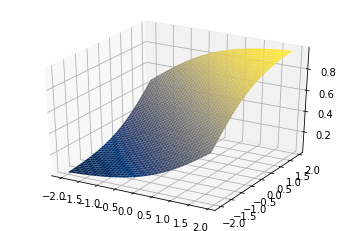

In [ ]:
# TO-DO: Your code goes here.
from mpl_toolkits import mplot3d
 
# creating an empty canvas
fig = plt.figure()

ax = plt.axes(projection="3d")

beta1=np.arange(-2,2,0.1)
beta0=np.arange(-2,2,0.1)
beta0, beta1 = np.meshgrid(beta0, beta1)
y=1/(1+np.exp(-(beta0+beta1)))

ax.plot_surface(beta0, beta1, y, cmap='cividis');
 
# Showing the above plot
plt.show()

### 1(b)(i) - 1(b)(ii): Mathematical Derivations & Proofs

(i) \\
$P(Y=1|X) = \frac{1}{1+e^{-(\beta_0+\beta_1x)}}=\frac{1}{1+e^{-y(\beta_0+\beta_1x)}}$ \\
$P(Y=-1|X) = 1-P(Y=1|X)=1-\frac{1}{1+e^{-(\beta_0+\beta_1x)}}=\frac{1+e^{-(\beta_0+\beta_1x)}-1}{1+e^{-(\beta_0+\beta_1x)}}=\frac{1}{1+e^{-y(\beta_0+\beta_1x)}}$ \\

So we can see that $P(Y|X) = \frac{1}{1+e^{-y(\beta_0+\beta_1x)}}$

(ii) \\
$LikeLihood function = \prod_m P(y_i|x_i) = \prod_m \frac{1}{1+e^{-y_i(\beta_0+\beta_1x_i)}}$ \\
$Log Likelihood function = \sum^m_{i=1} ln(\frac{1}{1+e^{-y_i(\beta_0+\beta_1x_i)}})=-\sum^m_{i=1} ln(1+e^{-y_i(\beta_0+\beta_1x_i)})$

### 1(b)(iii): Plotting Both Loglikelihood Function Graphs

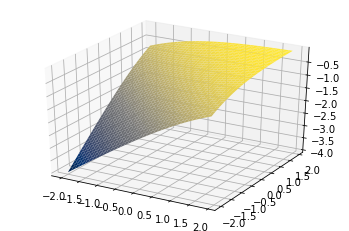

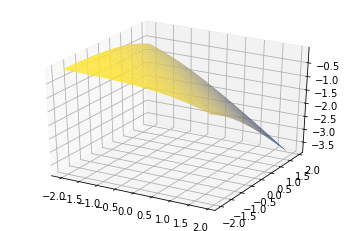

In [ ]:
# TO-DO: Your code goes here. 
fig = plt.figure()

beta1=np.arange(-2,2,0.1)
beta0=np.arange(-2,2,0.1)
beta0, beta1 = np.meshgrid(beta0, beta1)


y1=-np.log((1+np.exp(-(beta0+beta1))))
y2=-np.log((1+np.exp(beta0+beta1)))

ax = plt.axes(projection="3d")
ax.plot_surface(beta0, beta1, y1, cmap='cividis')
plt.show()

ax1 = plt.axes(projection="3d")
ax1.plot_surface(beta0, beta1, y2, cmap='cividis')
plt.show()
# Showing the above plot


### 1(b)(iv): Based on the graph, is it possible to maximize this function?

**Answer:** _(Yes, it is a convex function and we can maximize it.)_

## Question 2: Logistic Regression from Scratch

Load the data 

In [ ]:
# TO-DO: Use np.load(...) to read the data then assign the data to X, and the labels to y.
X = np.load('/content/drive/MyDrive/5420/data.npy')
y = np.load('/content/drive/MyDrive/5420/label.npy')

Visualize one input data point as an image for each of label 0 and label 1.

In [ ]:
X.shape

(14780, 784)

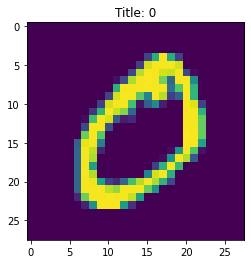

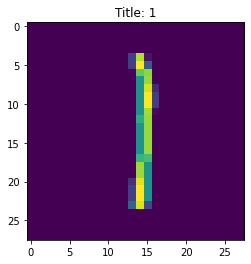

In [ ]:
# TO-DO: The data should be reshaped back to [28 x 28] to be able to visualize it using plt.imshow()
import matplotlib.pyplot as plt

plt.imshow(X[y==0][0].reshape(28,28))
plt.title('Title: 0')
plt.show()

plt.imshow(X[y==1][0].reshape(28,28))
plt.title('Title: 1')
plt.show()

Since the data is in between 0 to 255, normalize the data to [0, 1]

In [ ]:
# TO-DO: Normalize the data
X = X/255

Set $y_i = +1$ for images originally labeled 0, and $y_i = -1$ for images originally labeled 1.

In [ ]:
# TO-DO: Convert labels
y[y==1] = -1
y[y==0] = 1
y

array([ 1,  1,  1, ..., -1, -1, -1])

Split the data randomly into train and test with a ratio of 80:20.

In [ ]:
# TO-DO: Create function that takes in (X,y) and splits the data by returning (X_train, y_train, X_test, y_test)
def shuffle_dataset(X, y):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    return X[indices], y[indices]

def split(X,y,n):
  X, y = shuffle_dataset(X,y)
  X_train=X[:int(n*len(X))]
  y_train=y[:int(n*len(y))]
  X_test=X[int(n*len(X)):]
  y_test=y[int(n*len(y)):]
  return X_train, y_train, X_test, y_test

In [ ]:
# TO-DO: Call your function to perform the Train-Test Split on our data
X_train, y_train, X_test, y_test = split(X,y,0.8)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11824, 784), (11824,), (2956, 784), (2956,))

Sequential splitting may lead to different distribution of train and test dataset, and the trained model on train dataset can perform really bad on test dataset.

Initialize the coefficients $\beta_0^{(1)}$, **$\vec{\beta}$** using a Normal Distribution of mean 0 and variance 1.

For **$\beta_1$**, initialize all $d$ entries to be $N(0,1)$)

In [ ]:
# TO-DO: Initialize all d entries to be sampled from a standard normal distribution 
B = np.random.normal(loc=0.0, scale=1.0, size=[784,1])
B_0 = np.random.normal(loc=0.0, scale=1.0, size=[1,1])

Compute the loss function
$$L(\beta_0^{(1)}, \vec{\beta}) = \frac{1}{m}\sum_{i=1}^m \text{ln}(1+e^{-y_i (\beta_0 + \sum_{j=1}^d \beta_{j}x_{i,j})})$$
where $x_{i,j}$ is the $j$-th of entry data point $\vec{\textbf{x}_i}$

In [ ]:
# TO DO: Helper function to compute loss
def compute_loss(data, labels, B, B_0):
  exp = np.exp(-labels.reshape(-1,1)*(B_0+data@B))
  return np.mean(np.log(1+exp),axis=0)

Compute the gradients of the loss function

$$\frac{\partial L}{\partial \beta_0} = d\beta_0 = -\frac{1}{m}\sum_{i=1}^m \frac{e^{-y_i \cdot (\beta_0 + \vec{\beta^T} \vec{x_{i}})}}{1 + e^{-y_i (\beta_0 + \vec{\beta^T} \vec{x_{i}})}} y_i$$
$$\nabla_\beta L = d\vec{\beta} = -\frac{1}{m}\sum_{i=1}^m \frac{e^{-y_i \cdot (\beta_0 + \vec{\beta^T} \vec{x_{i}})}}{1 + e^{-y_i (\beta_0 + \vec{\beta^T} \vec{x_{i}})}} y_i x_i$$

In [ ]:
# TO-DO: Helper function to compute loss
def compute_gradients(data, labels, B, B_0):
  exp = np.exp(-labels.reshape(-1,1)*(B_0+data@B))
  grad_0 = -np.sum(labels.reshape(-1,1)*exp/(1+exp))/len(data)
  grad_1 = (data.T@(-labels.reshape(-1,1)*exp/(1+exp)))/len(data)
  return grad_1, grad_0

Update the parameters using gradient updates from the train set as:
$$\beta_j \leftarrow \beta_j - 0.05 \cdot d\beta_j$$
$$\beta_0 \leftarrow \beta_0 - 0.05 \cdot d\beta_0$$

Repeat the process for 50 iterations. You should save your results for each of the 50 epochs in `accuracy_hist`, `train_loss_hist`, and `test_lost_hist`.

In [ ]:
# TO-DO: Write your code below. This will be the longest part!
accuracy_hist = []
train_loss_hist = []
test_loss_hist = []

for i in range(50):
  train_loss = compute_loss(X_train, y_train, B, B_0)
  test_loss = compute_loss(X_test, y_test, B, B_0)

  grad_1, grad_0 = compute_gradients(X_train, y_train, B, B_0)

  train_loss_hist.append(train_loss)
  test_loss_hist.append(test_loss)

  B = B - 0.05*grad_1
  B_0 = B_0 - 0.05*grad_0

  print('Iteration:',i,'Training loss:',train_loss)
  
  # calculate test accuracy
  exp = np.exp(-(B_0+X_test@B))
  outputs = (1/(1+exp)).reshape(-1)
  outputs = np.array([1 if i >= 0.5 else -1 for i in outputs])
  accuracy_hist.append(np.mean(outputs==y_test))

Iteration: 0 Training loss: [2.94417521]
Iteration: 1 Training loss: [2.52182486]
Iteration: 2 Training loss: [2.17007204]
Iteration: 3 Training loss: [1.88244675]
Iteration: 4 Training loss: [1.64924139]
Iteration: 5 Training loss: [1.46062259]
Iteration: 6 Training loss: [1.30770247]
Iteration: 7 Training loss: [1.18286496]
Iteration: 8 Training loss: [1.08002546]
Iteration: 9 Training loss: [0.99442463]
Iteration: 10 Training loss: [0.9223231]
Iteration: 11 Training loss: [0.86082706]
Iteration: 12 Training loss: [0.80773479]
Iteration: 13 Training loss: [0.76138134]
Iteration: 14 Training loss: [0.72050492]
Iteration: 15 Training loss: [0.68414114]
Iteration: 16 Training loss: [0.65154296]
Iteration: 17 Training loss: [0.6221229]
Iteration: 18 Training loss: [0.59541217]
Iteration: 19 Training loss: [0.57103187]
Iteration: 20 Training loss: [0.54867232]
Iteration: 21 Training loss: [0.52807804]
Iteration: 22 Training loss: [0.50903648]
Iteration: 23 Training loss: [0.49136955]
Iter

Plot your training and testing loss curves side-by-side below by running the plotting code given below. You don't need to modify these two cells.

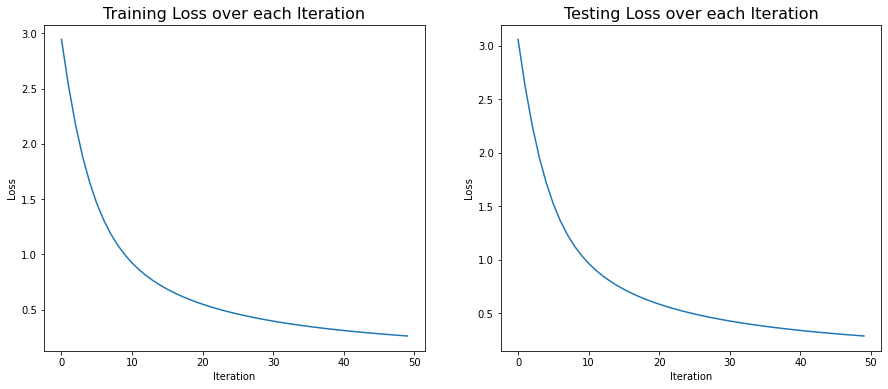

In [ ]:
fig = plt.figure(figsize = (15,6))

# Plot Loss Function
ax1 = fig.add_subplot(121)
ax1.plot(train_loss_hist);
ax1.set_title("Training Loss over each Iteration", fontsize = 16);
ax1.set_xlabel("Iteration");
ax1.set_ylabel("Loss");

# Plot Accuracy Function
ax2 = fig.add_subplot(122)
ax2.plot(test_loss_hist);
ax2.set_title("Testing Loss over each Iteration", fontsize = 16);
ax2.set_xlabel("Iteration");
ax2.set_ylabel("Loss");

## Classification Rule

Since we have $P(Y=1|X)=\frac{1}{1+e^{-(\beta_0+\beta x^T)}}\geq 0.5$, we can derive that $1+e^{-(\beta_0+\beta x^T)} \leq 2, e^{-(\beta_0+\beta x^T)}\leq 1,-(\beta_0+\beta x^T) \leq 0, \beta_0+\beta x^T \geq 0$ \\
So our classification rule can be written as followed: \\
When $\beta_0+\beta x^T \geq 0, Y=1; \beta_0+\beta x^T \leq 0, Y=0$

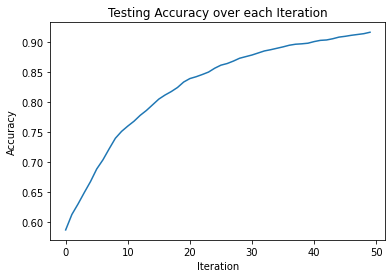

In [ ]:
# Plot your accuracy curve below by running the template code below
plt.plot(accuracy_hist);
plt.title("Testing Accuracy over each Iteration");
plt.xlabel("Iteration");
plt.ylabel("Accuracy");

## Question 3: Built-in Logistic Rgeression vs. Bayes Optimal Classifiers

### 3(a)
Please see the derivation in the handwritten pages.

### 3(b)
Using Python, generate $n$ = 100 training data points according to the distribution designed above and train a binary classifier using logistic regression on training data.

In [ ]:
# Recommended Imports (you may use others if you wish) 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action='ignore');

In [ ]:
# TO-DO: Your code goes here. Add code blocks as needed.
def generator(p,q,n):
  y=[]
  x = np.random.uniform(0,1,n)
  for i in x:
    if i > 0.5:
      y.append(np.random.binomial(1,q,1)[0])
    else:
      y.append(np.random.binomial(1,p,1)[0])
  return x,y

In [ ]:
clf = LogisticRegression()
x, y = generator(0.88,0.12,100)
clf.fit(x.reshape(-1,1),y)

LogisticRegression()

### 3(c)
Generate $n$ = 100 test data points according to the distribution designed in part (a).

In [ ]:
# TO-DO: Your code goes here.
x_test, y_test = generator(0.88,0.12,100)

Compute the prediction accuracy (on the test data) of the classifier designed in part (b).

In [ ]:
# TO-DO: Your code goes here.
y_pred=clf.predict(x_test.reshape(-1,1))
acc = np.mean(y_pred==y_test)
acc

0.82

Compute the accuracy of the Bayesian Optimal Classifier on the test data.

In [ ]:
# TO-DO: Your code goes here. Add codeblocks as needed.
def bayes_acc(x,y,p,q):
  y_pred=[]
  for i in x:
    if i <= 0.5:
      if p>0.5:
        y_pred.append(1)
      else:
        y_pred.append(0)
    else:
      if q>0.5:
        y_pred.append(1)
      else:
        y_pred.append(0)
  return y_pred

In [ ]:
y_pred = np.array(bayes_acc(x_test, y_test,0.88,0.12))
np.mean(y_pred == y_test)

0.88

**_Written/Typed Question_: Why do you think Bayes optimal classifier is performing better?**

**_Answer_:** <span style="color:green"> (Because bayes optimal classifier uses the actual distribution to perform the prediction.) </span>

### 3(d)
Redo parts (b) - (c) with $n$ = 1000.

In [ ]:
### Replicate part (b) by calling the appropriate functions ###
clf = LogisticRegression()
x, y = generator(0.88,0.12,1000)
clf.fit(x.reshape(-1,1),y)

LogisticRegression()

In [ ]:
### Replicate part (c) by calling the appropriate functions ###
x_test, y_test = generator(0.88,0.12,1000)
y_pred=clf.predict(x_test.reshape(-1,1))
acc1 = np.mean(y_pred==y_test)
y_pred = np.array(bayes_acc(x_test, y_test,0.88,0.12))
acc2 = np.mean(y_pred == y_test)
acc1, acc2

(0.893, 0.897)

**_Written/Typed Question_: Are the results any different than part(c)? Why?**

**_Answer_:** <span style="color:green"> (The accuracies of 1000 samples are a little higher than that of the model with 100 samples. Because we use more information with 1000 data and we have a better model.) </span>

## Congratulations!!!

You're done with all the coding questions! Now convert this `.ipynb` into a `.pdf` neatly to prevent cells and figures from splitting across pages and getting weirdly truncated by following these steps:

1. Download your Colab notebook as an `.ipynb` file to save locally on your computer
2. Open it locally via Jupyter Notebook
3. Go to “print preview” mode
4. Print to `.pdf` from there.

Leave enough time to ask for help if you're stuck so you don't get hit with the Late Penalty!